In [2]:
from clscurves import MetricsGenerator
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [9]:
digits = datasets.load_digits()

In [97]:
X = digits["data"]
y = digits["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.8,
    random_state = np.random.RandomState(0))

In [98]:
random_state = np.random.RandomState(2)
model = LogisticRegression(
    multi_class="multinomial",
    random_state=random_state,
    max_iter=10000)

In [99]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial',
                   random_state=RandomState(MT19937) at 0x7F9D5039B050)

In [100]:
pred_test = model.predict_proba(
    X_test + 10 * np.random.randn(*X_test.shape))
pred_train = model.predict_proba(X_train)

y_test_0 = (y_test == 0).astype(int)
y_train_0 = (y_train == 0).astype(int)
pred_test_0 = pred_test[:, 0]
pred_train_0 = pred_train[:, 0]

In [101]:
df_test = pd.DataFrame({
    "label": y_test_0,
    "score": pred_test_0
})

df_train = pd.DataFrame({
    "label": y_train_0,
    "score": pred_train_0
})

In [131]:
mg = MetricsGenerator(
    df_test,
    label_column = "label",
    score_column = "score",
    score_is_probability = False,
    reverse_thresh = False,
    num_bootstrap_samples = 50)

Creating 50 bootstrap samples...
Computing confusion matrices...
Computing performance metric curves...
Computing area metrics...
Complete.


In [132]:
mg.compute_cost()

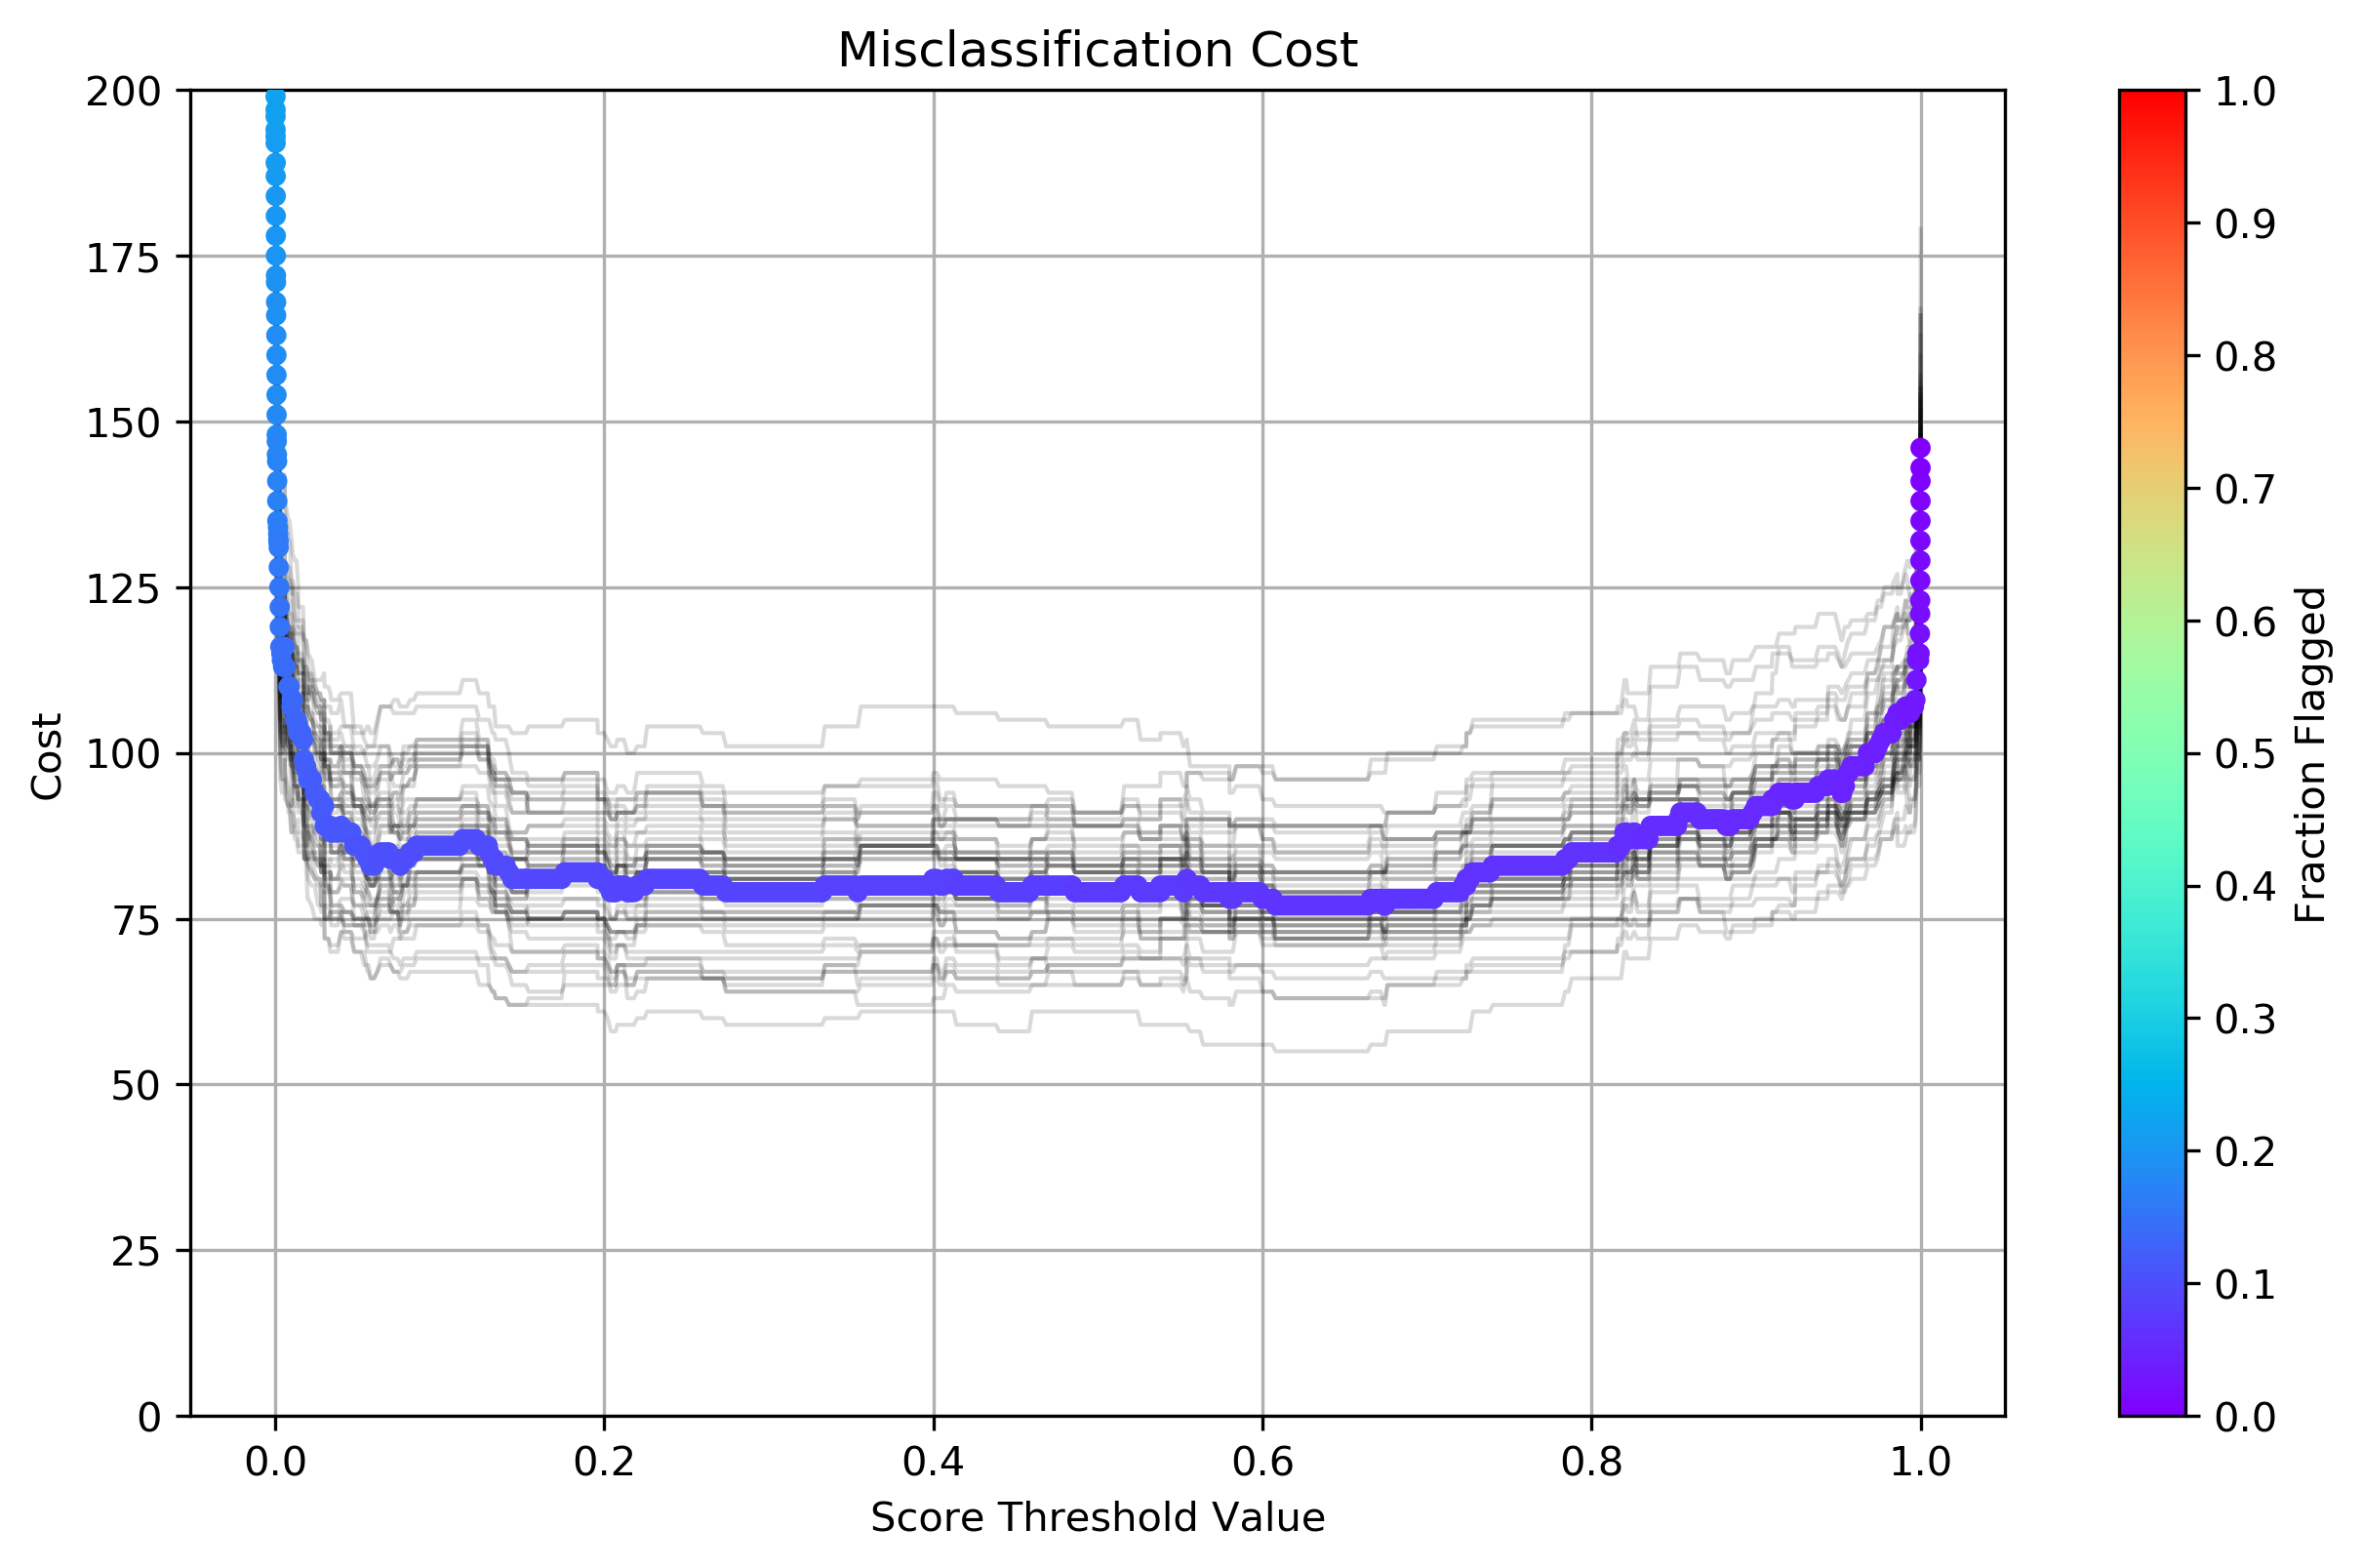

In [156]:
mg.plot_cost(
    y_rng = [0, 200],
    bootstrapped = True,
    dpi = 300)

Making scatter plot...


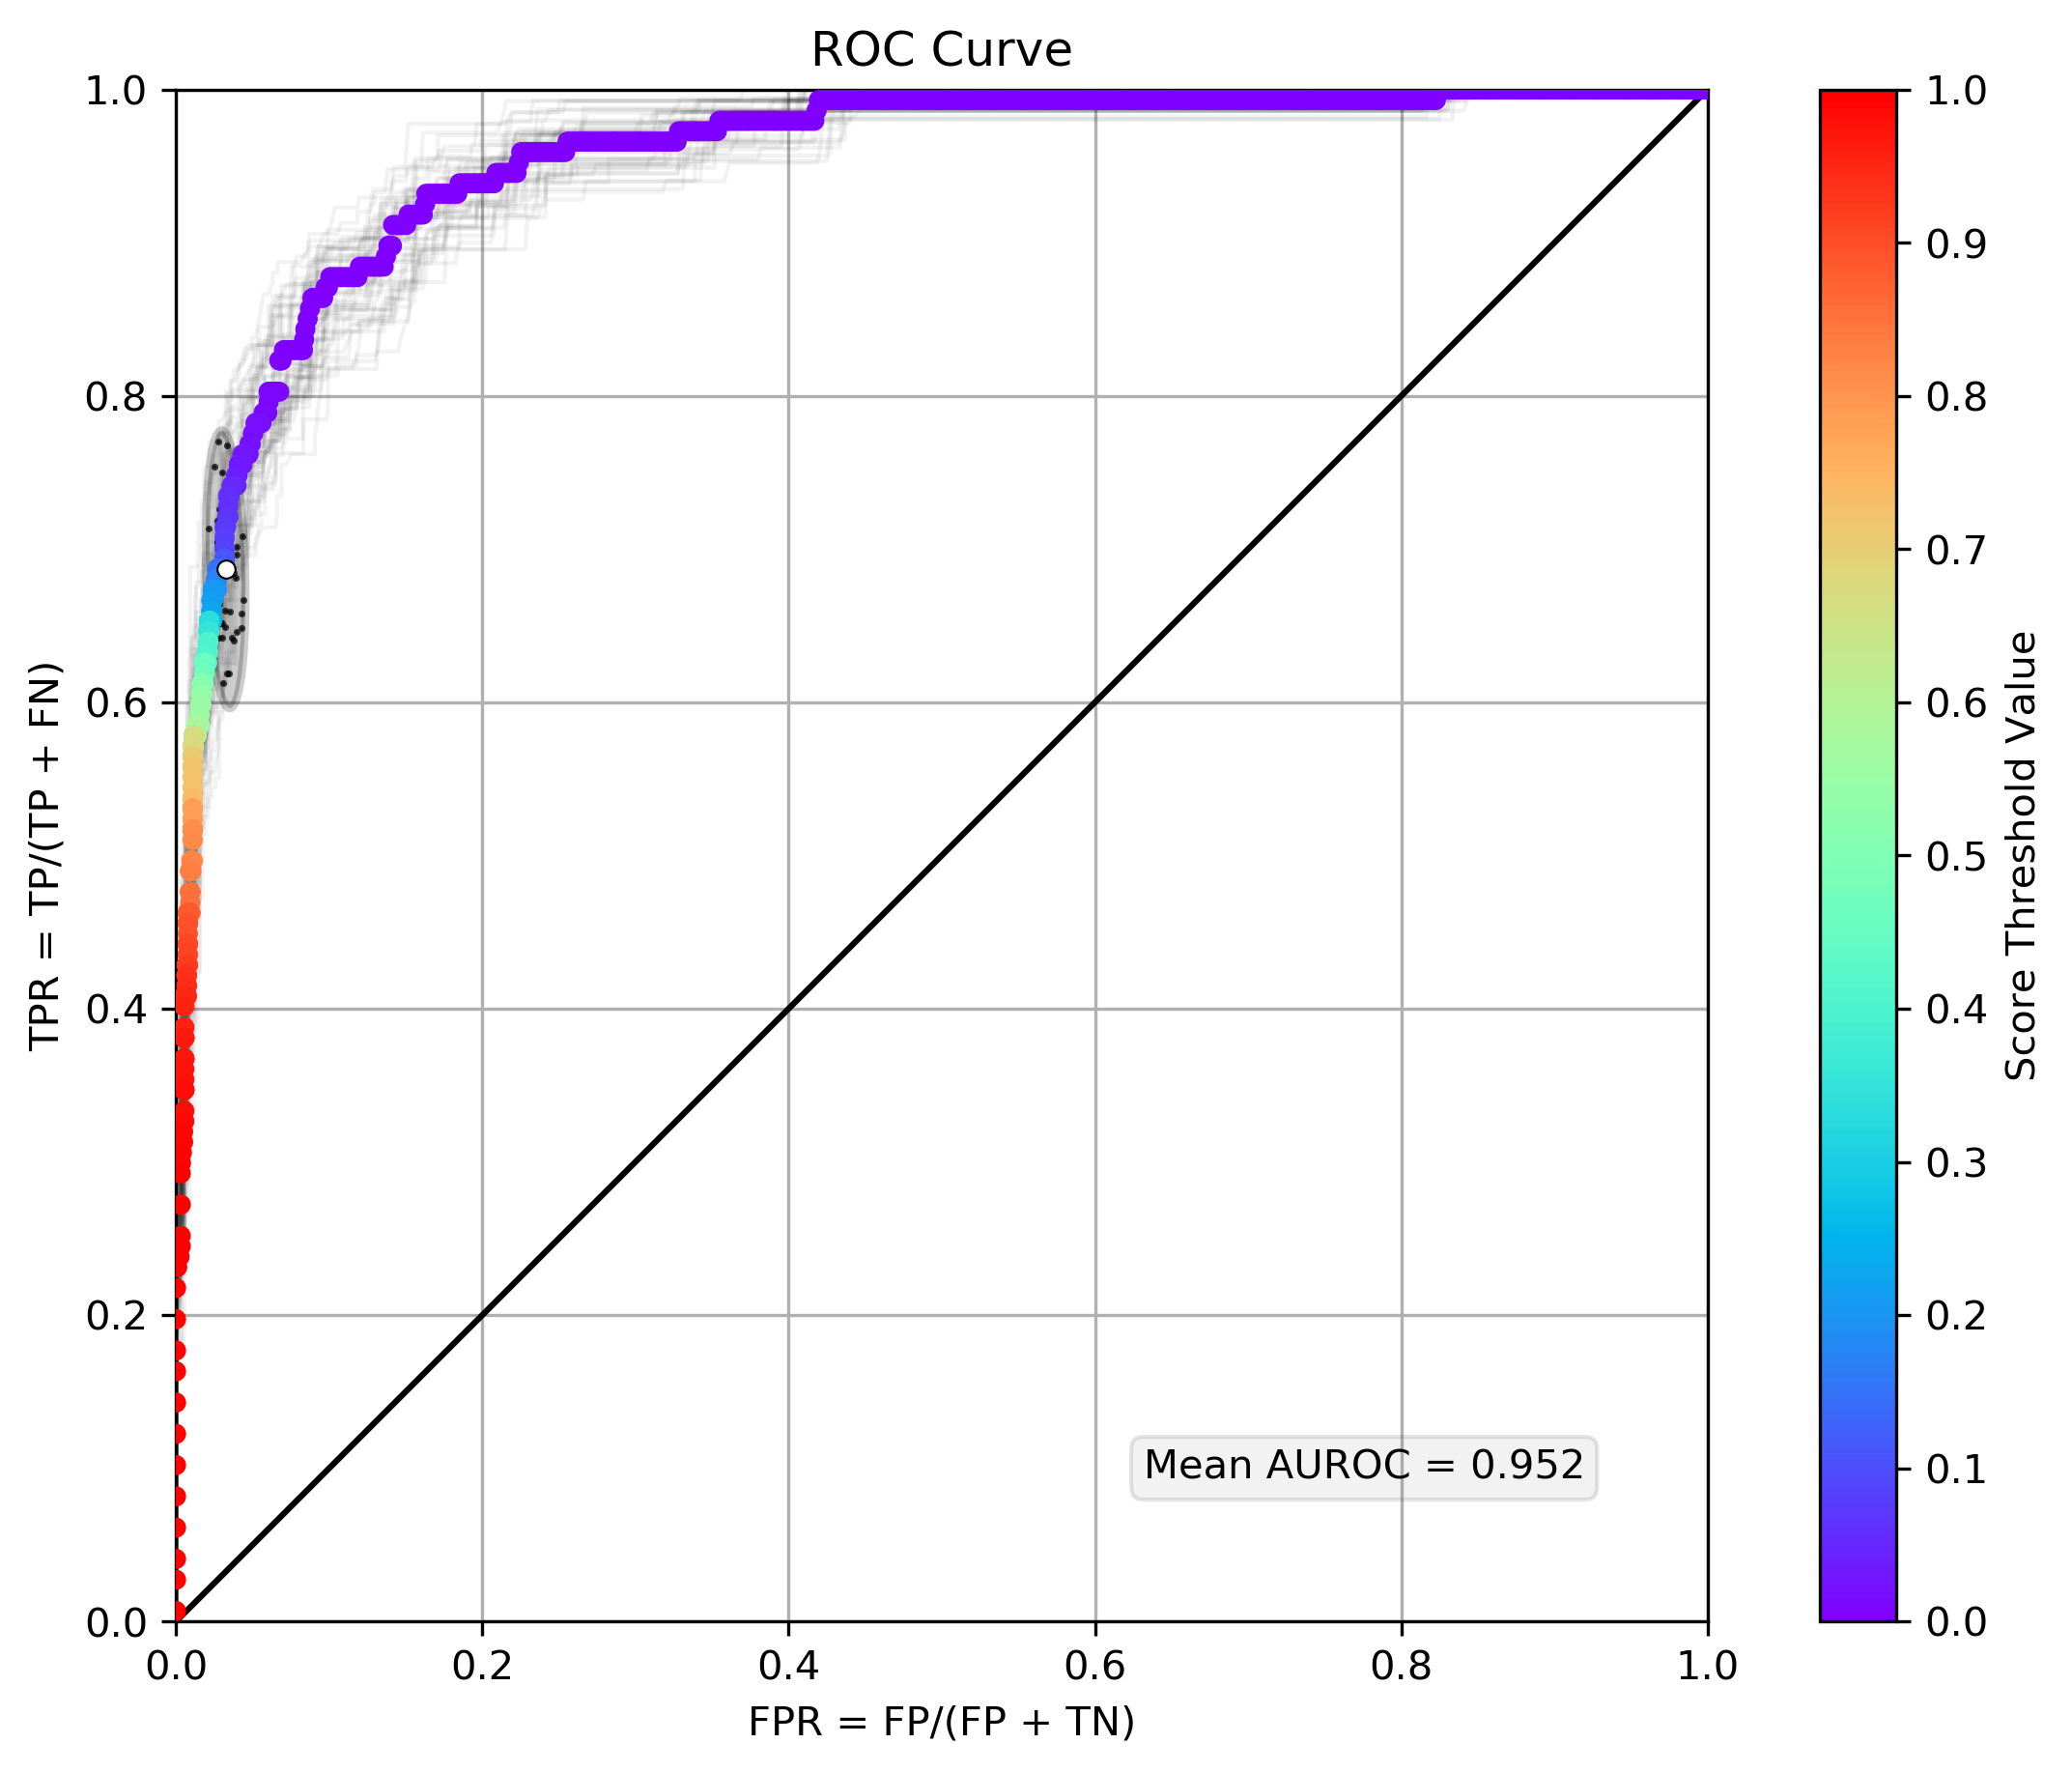

In [152]:
mg.plot_roc(
    op_value = 0.1,
    bootstrapped = True,
    bootstrap_alpha = 0.05,
    dpi = 300)

Making scatter plot...


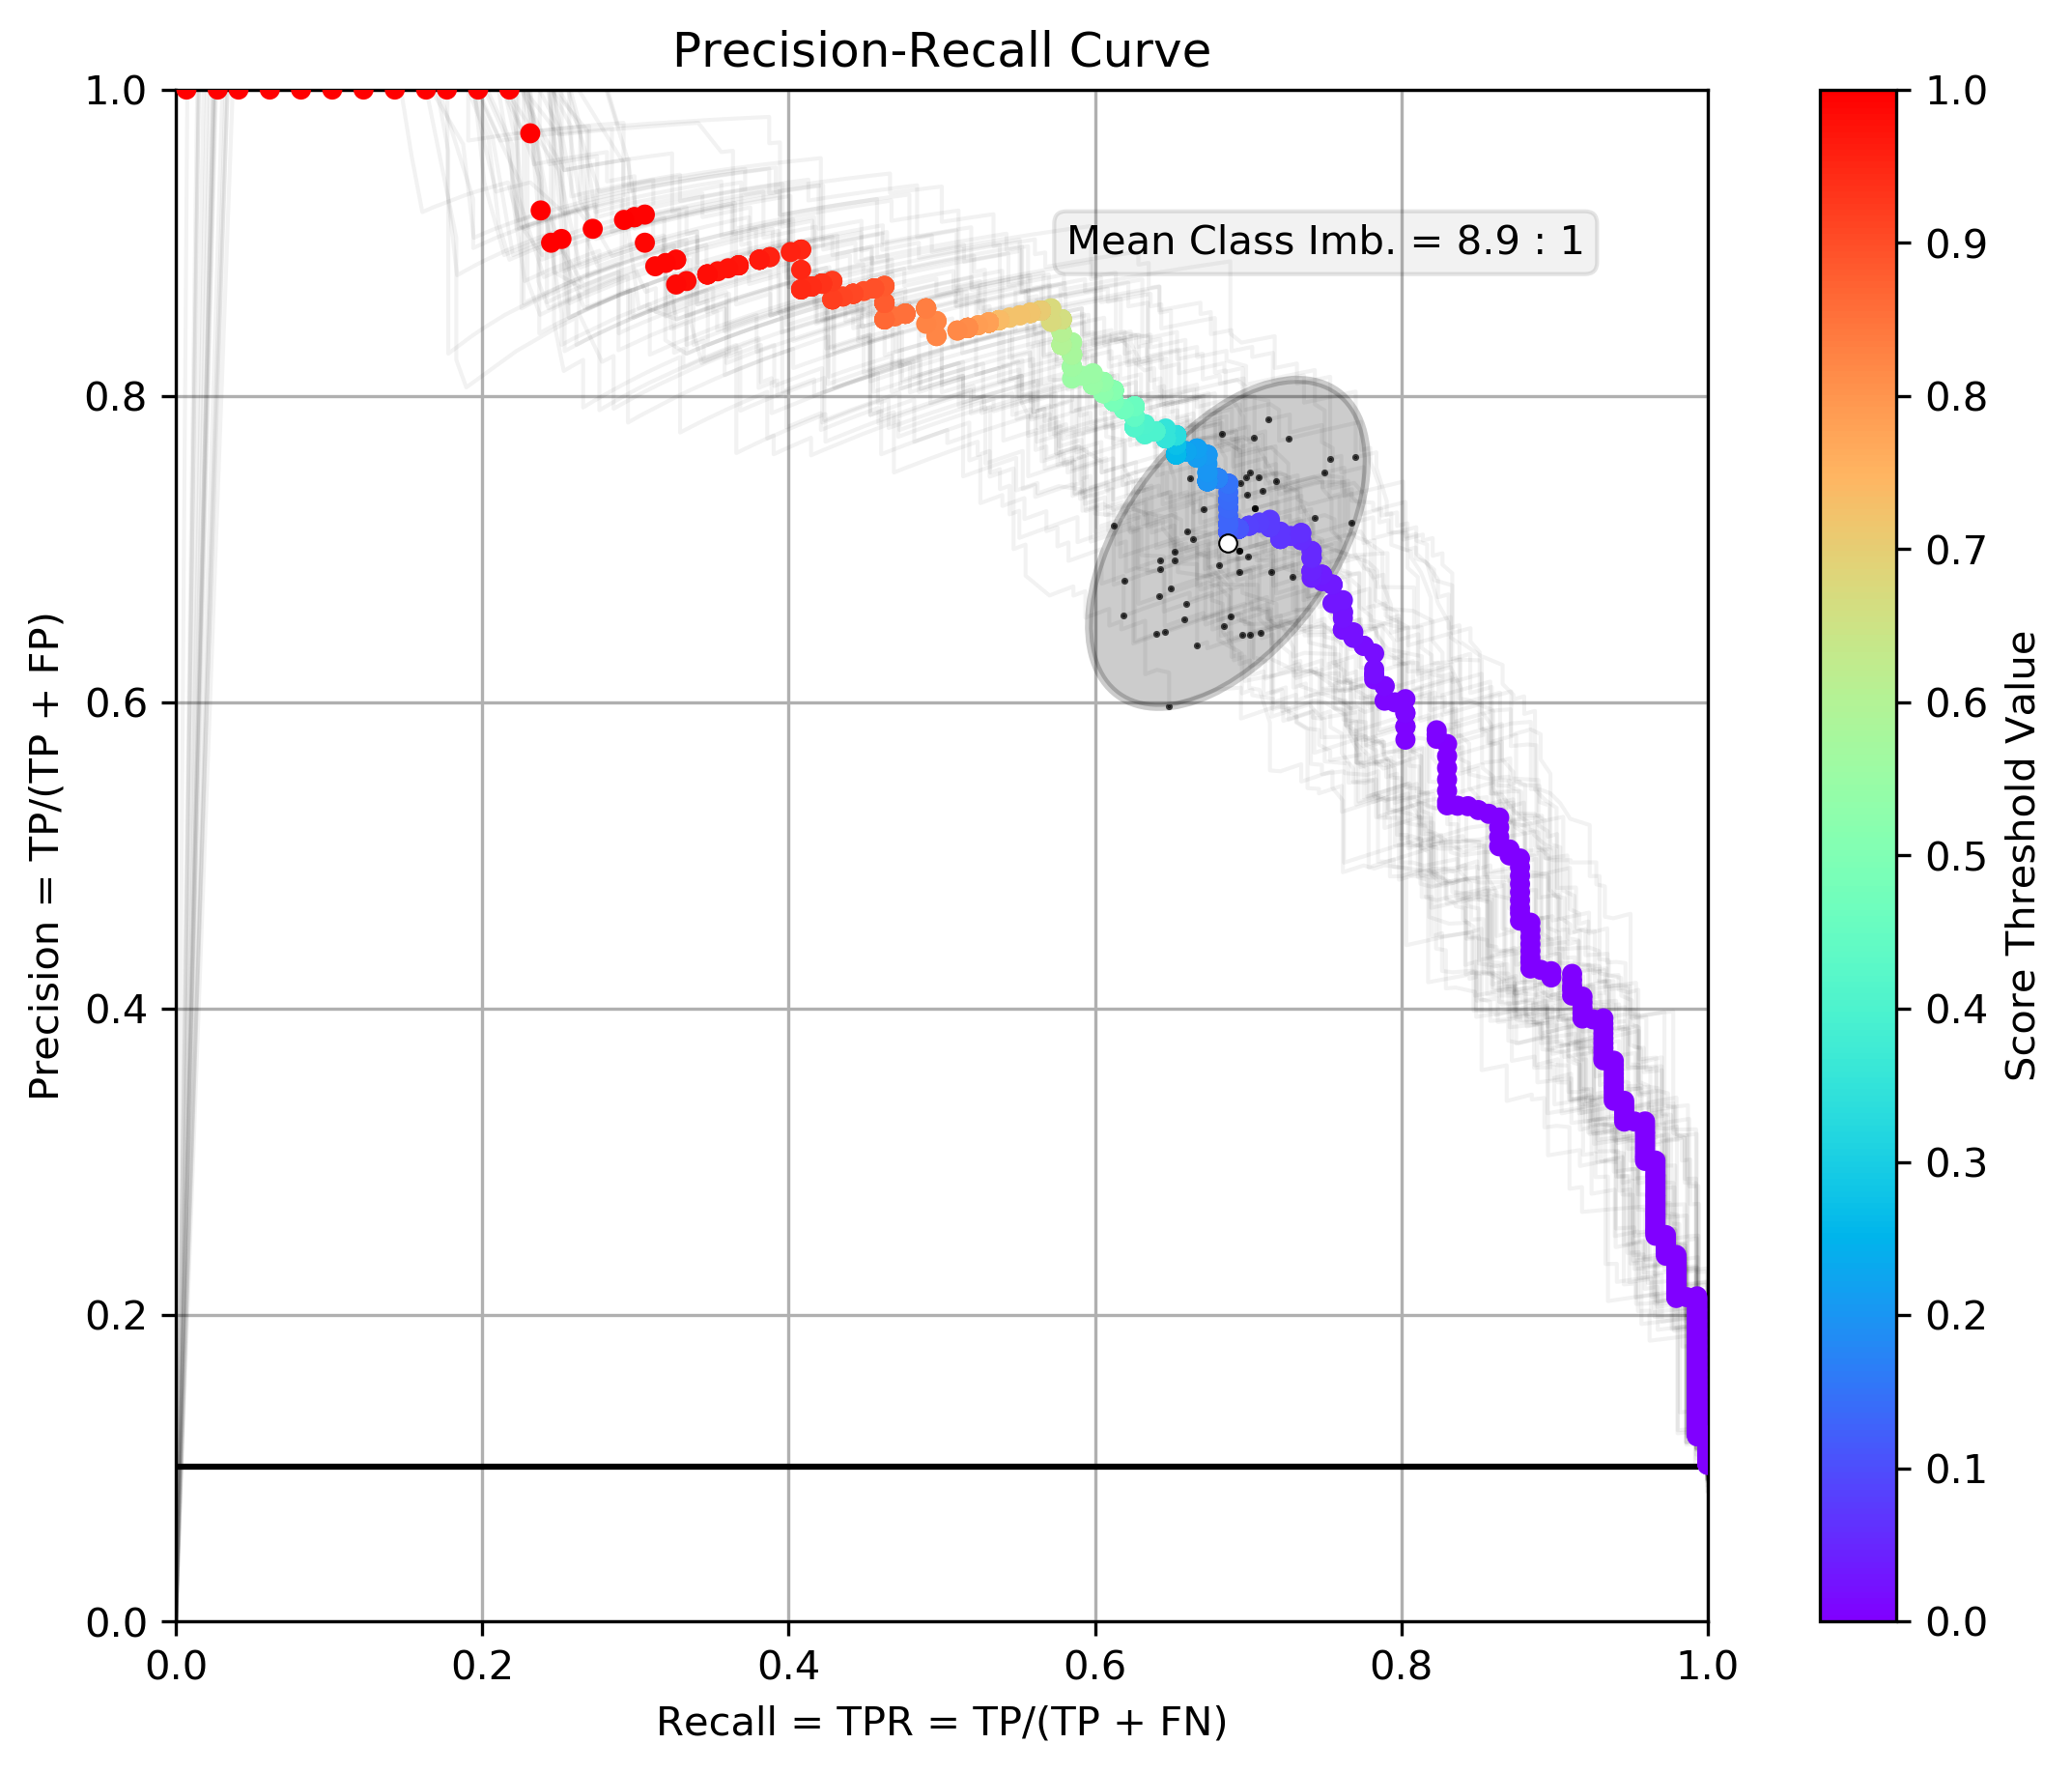

In [154]:
mg.plot_pr(
    op_value = 0.1,
    bootstrapped = True,
    bootstrap_alpha = 0.05,
    dpi = 300)

Making scatter plot...


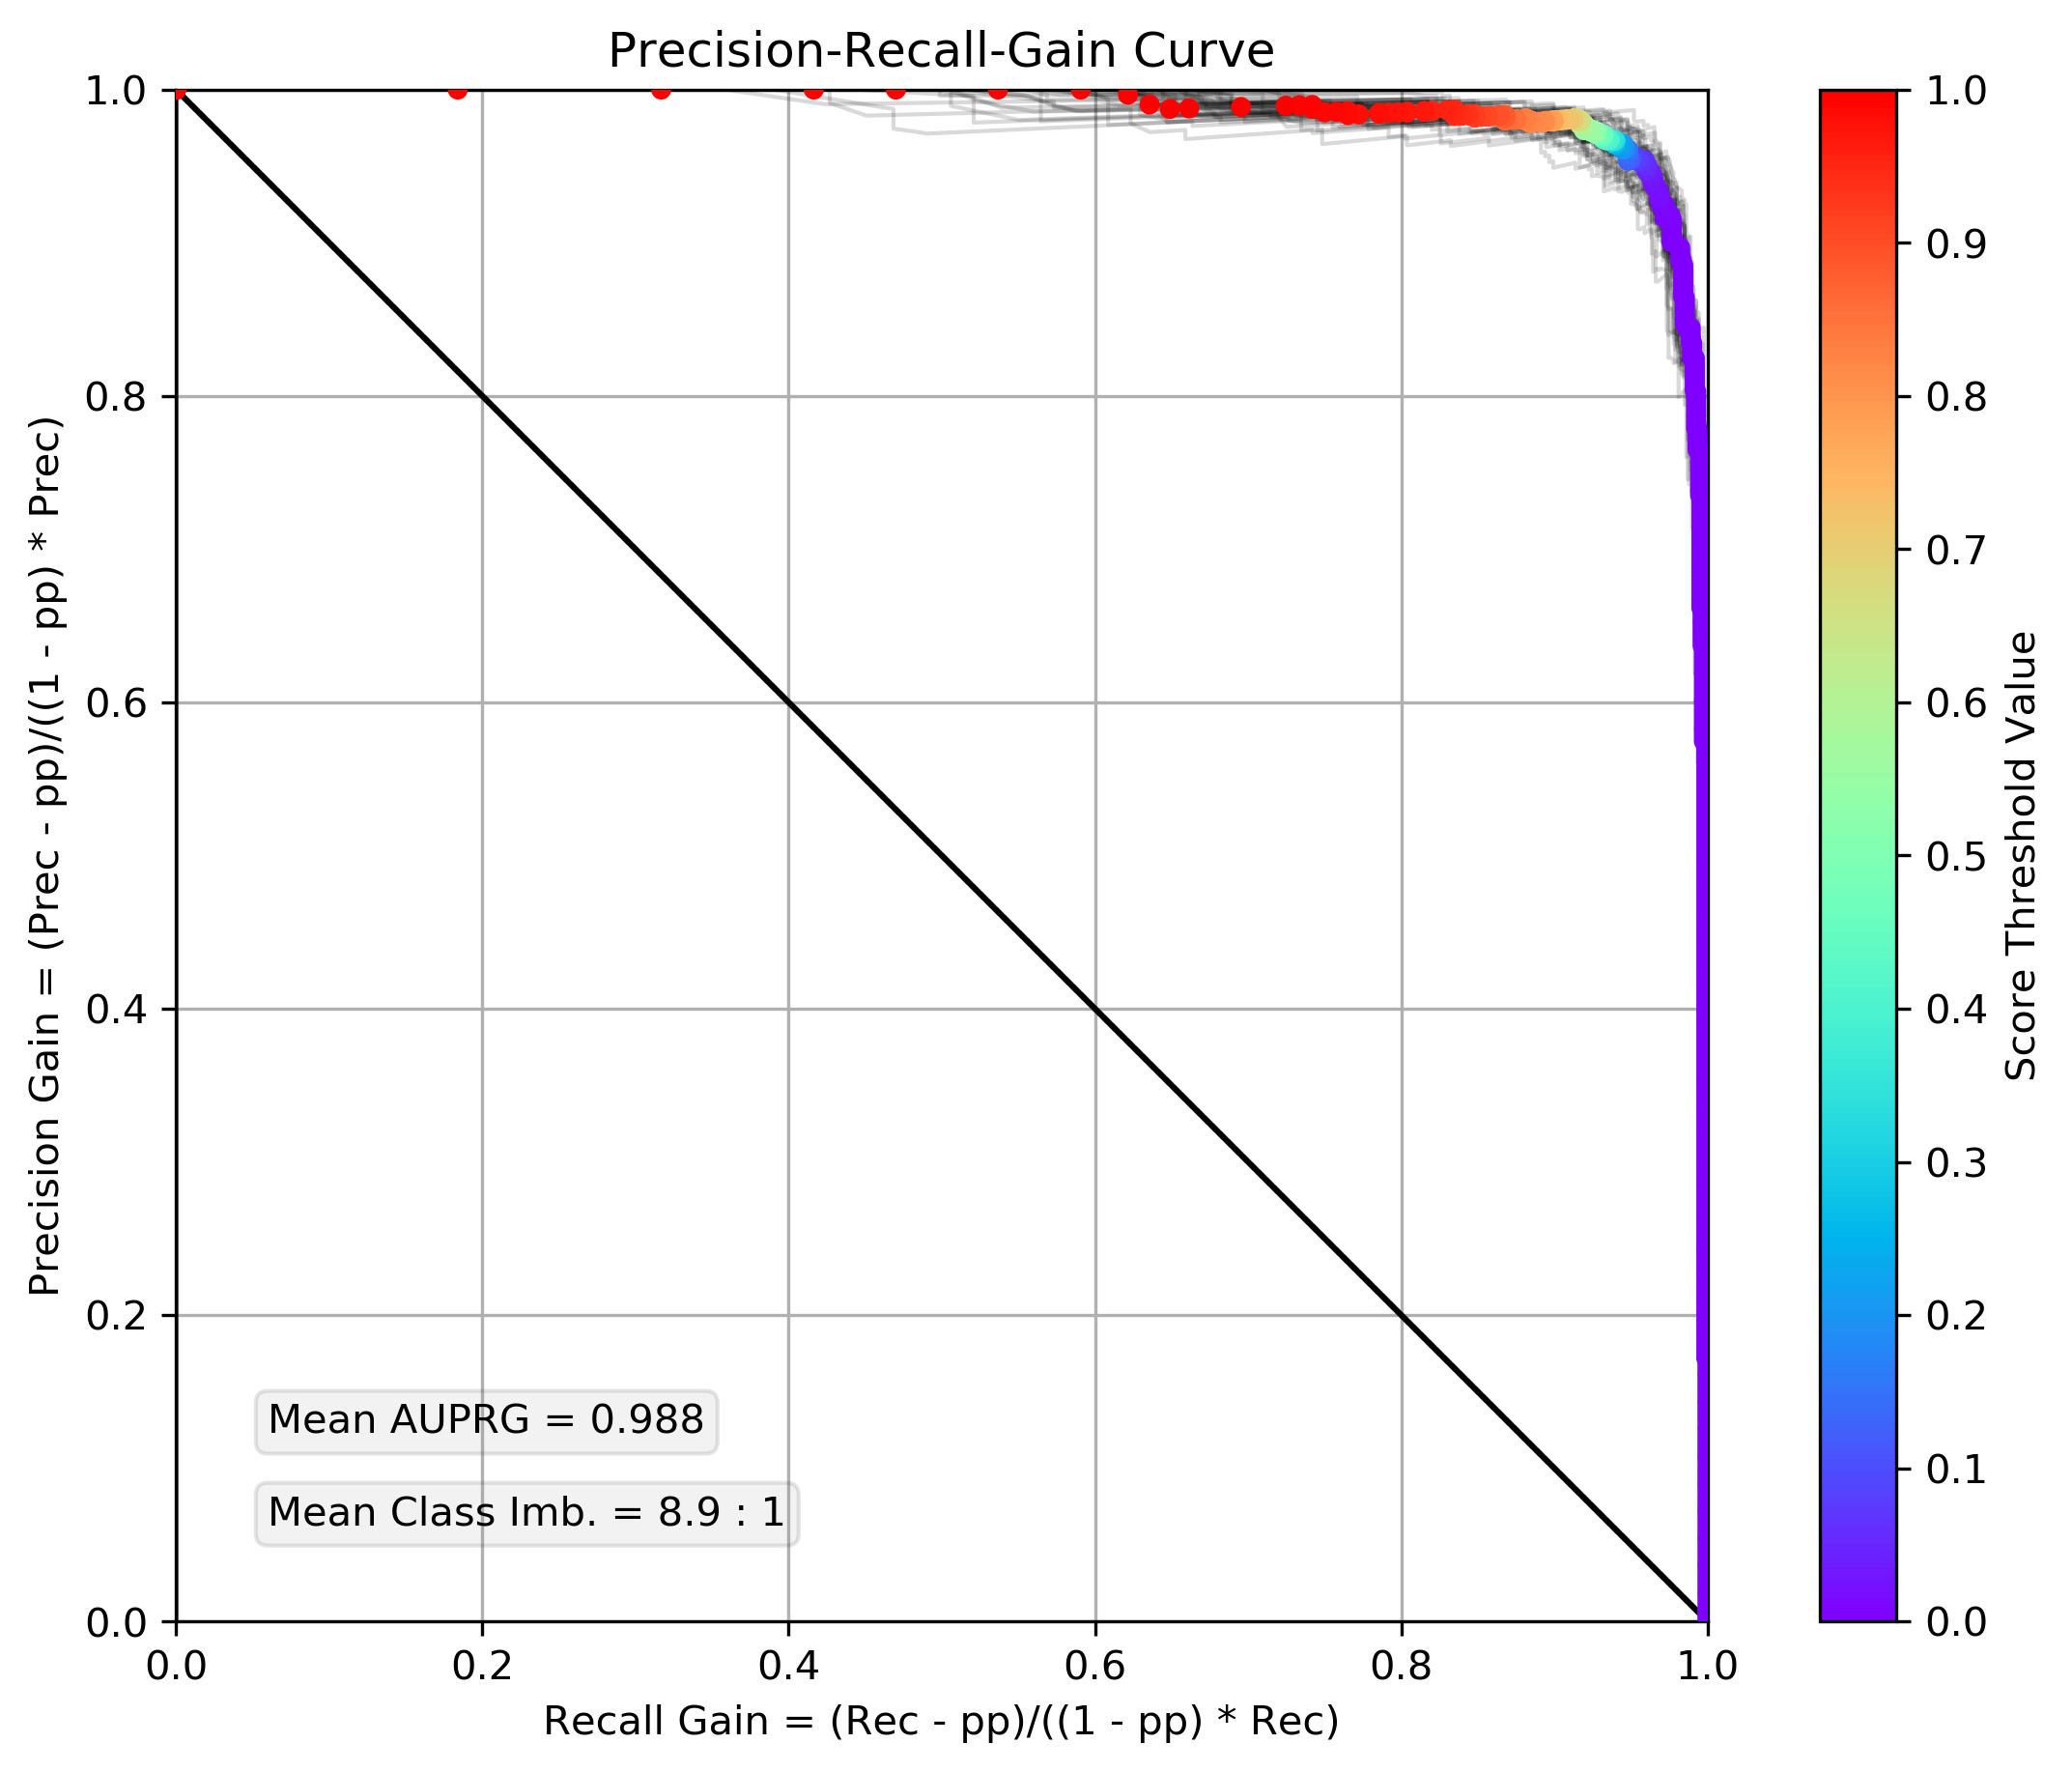

In [136]:
mg.plot_prg(
    bootstrapped = True,
    dpi = 300)

Making scatter plot...


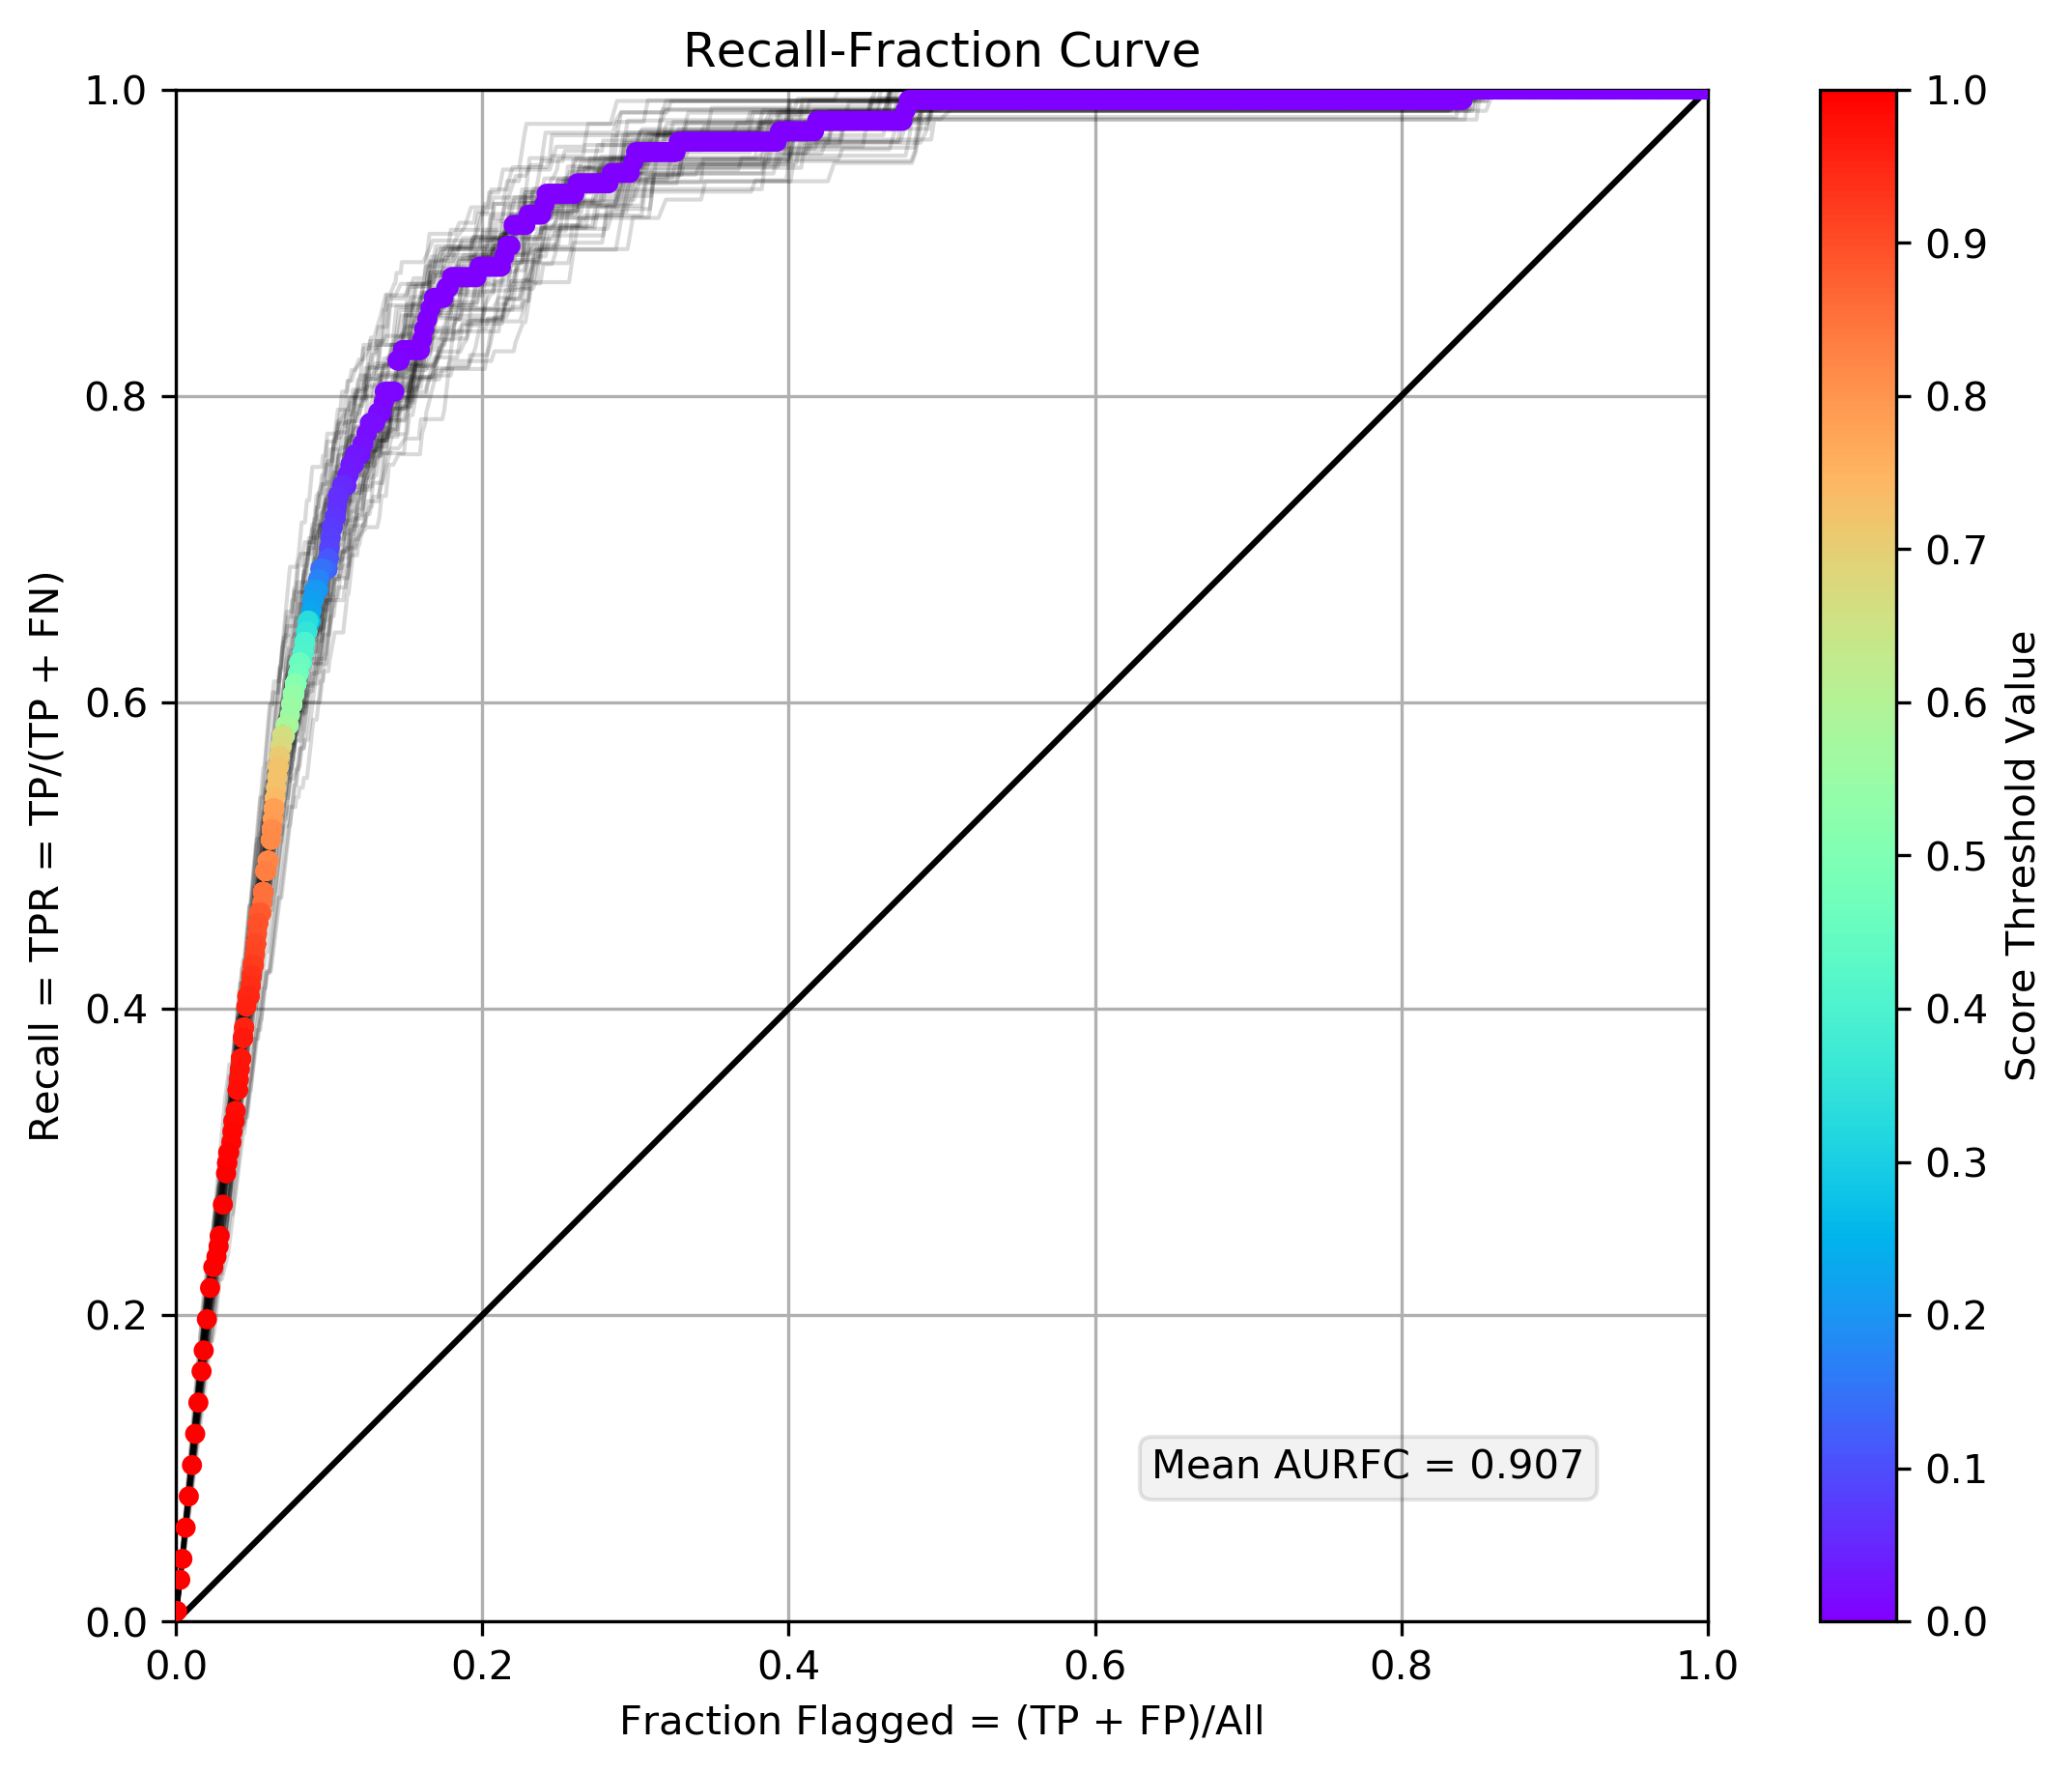

In [143]:
mg.plot_rf(
    bootstrapped = True,
    dpi = 300,
    cmap = "rainbow")

Making scatter plot...


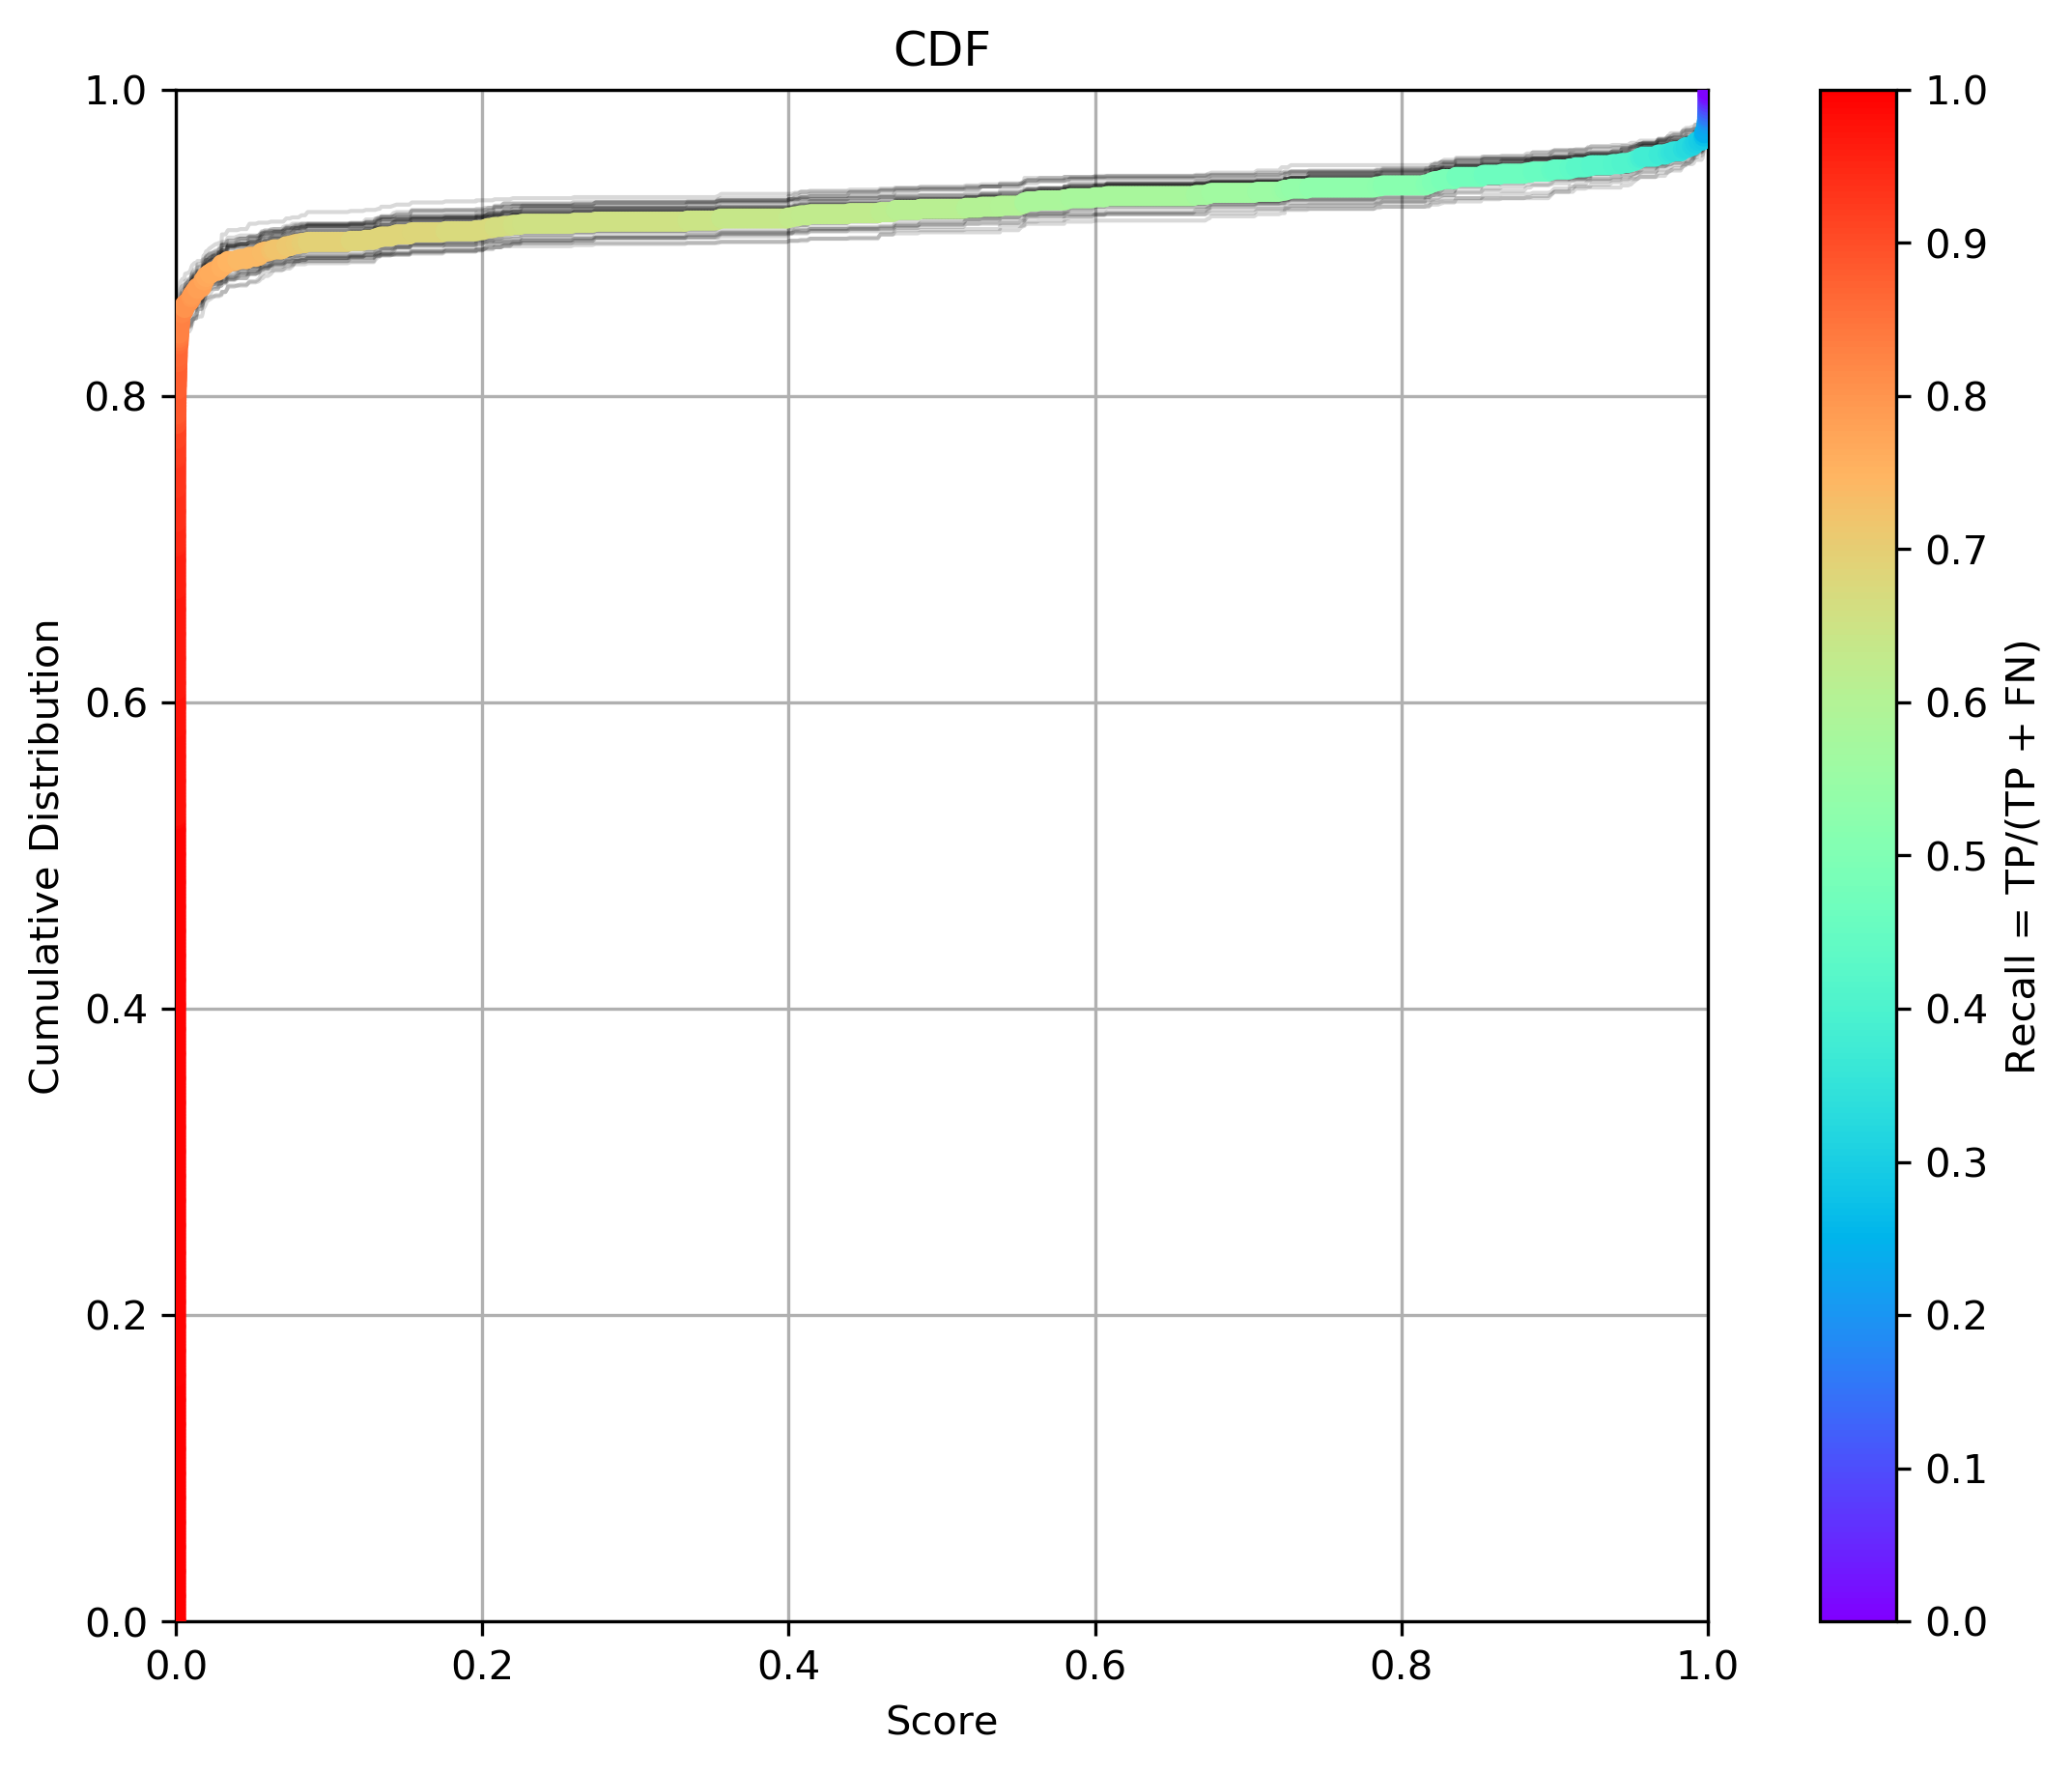

In [168]:
mg.plot_dist(
    bootstrapped = True,
    kind = "cdf",
    dpi = 300)

Making scatter plot...


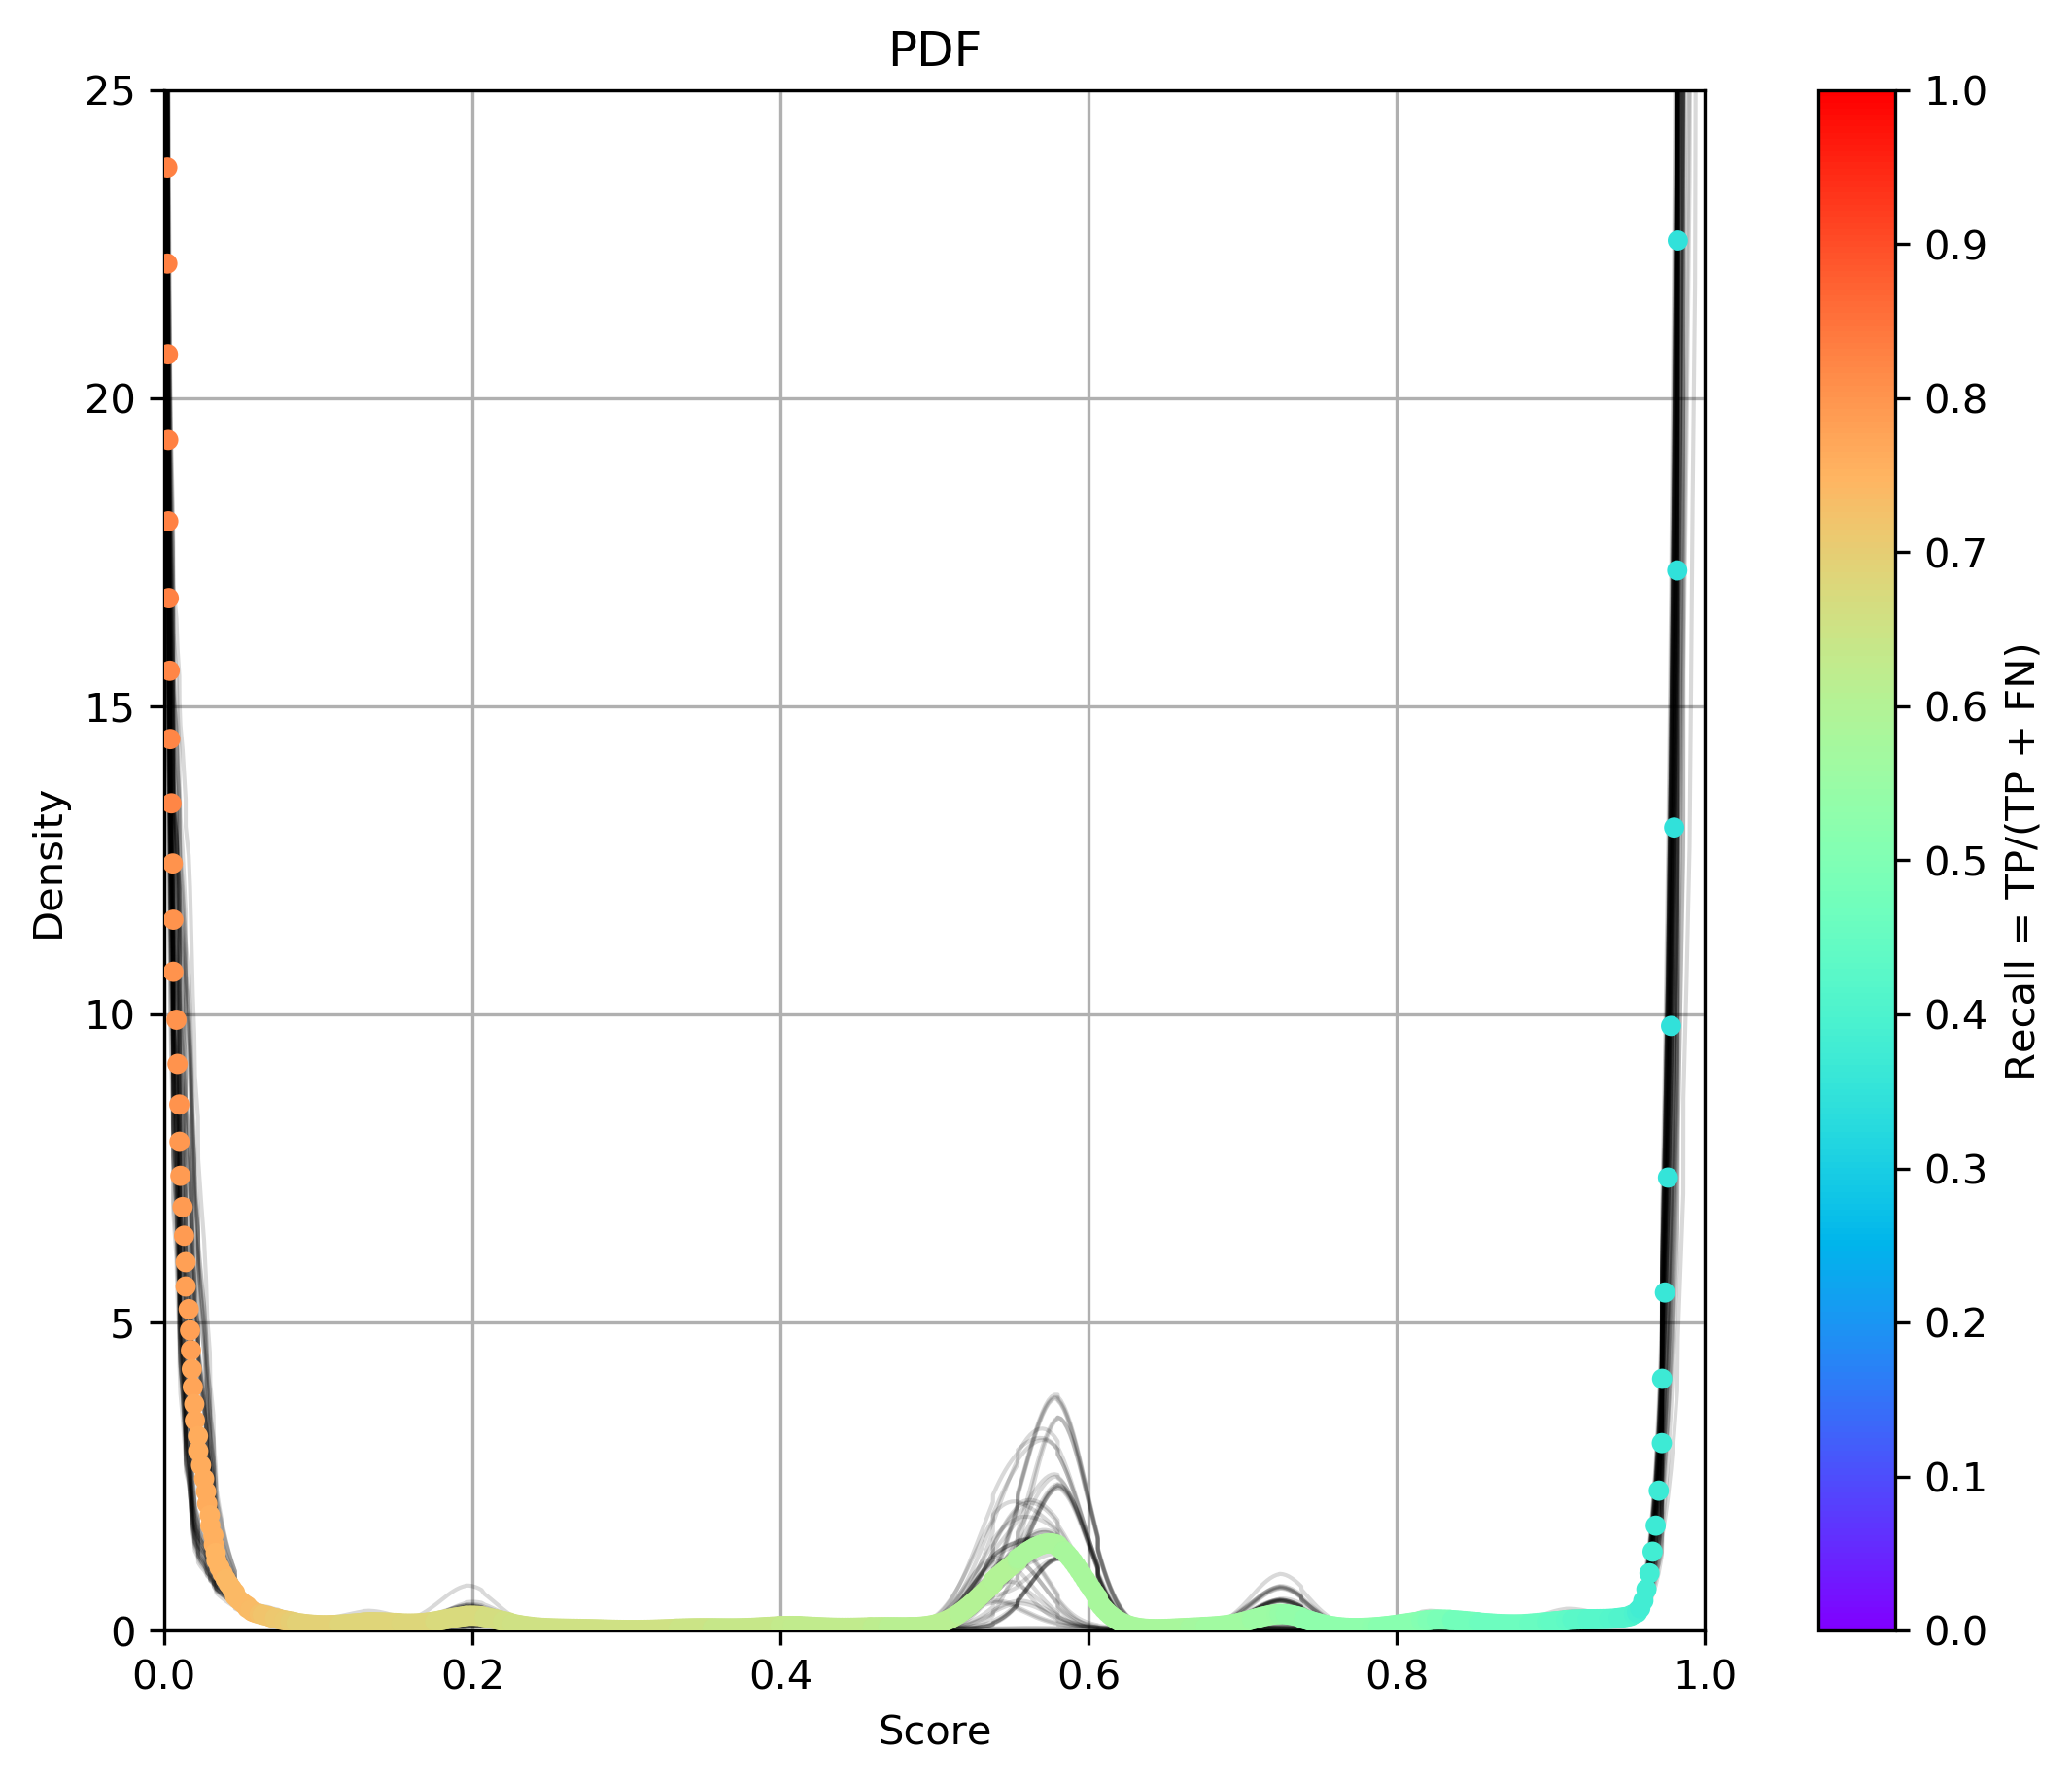

In [158]:
mg.plot_dist(
    y_rng = [0, 25],
    bootstrapped = True,
    kind = "pdf",
    kernel_size = 10,
    dpi = 300)